In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import psycopg2 as psy
import os 
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import *
import sys
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor

%matplotlib inline

os.getcwd()

'/Users/HudsonCavanagh/GA_dsi-projects/capstone'

### In an ideal world, would need to go through this dataset and fix counties that have been renamed/ combined etc...

https://www.census.gov/geo/reference/county-changes.html

In [2]:
unemp_03_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/unemp_tot_03_14.csv')
unemp_03_14 = unemp_03_14.iloc[:,1:]

pov_county_year_03_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pov_county_year_03_14.csv')
pov_county_year_03_14 = pov_county_year_03_14.iloc[:,1:]

cdc_03_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/cdc_03_14.csv')
cdc_03_14 = cdc_03_14.iloc[:,2:]
cdc_03_14.head(12)

,County,County Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Hispanic Origin,Hispanic Origin Code,...,year,pct_total_deaths,deaths,population,crude_100k,county_id,state,county_code,CTYNAME,pop_merge_ind
0,"Jefferson County, AL",1073.0,15-24 years,15-24,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.027,11.0,19306.0,56.977106,1073,AL,1073,Jefferson County,Jefferson County_2014
1,"Jefferson County, AL",1073.0,25-34 years,25-34,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.039,16.0,23590.0,67.825350,1073,AL,1073,Jefferson County,Jefferson County_2014
2,"Jefferson County, AL",1073.0,25-34 years,25-34,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.065,27.0,22917.0,117.816468,1073,AL,1073,Jefferson County,Jefferson County_2014
3,"Jefferson County, AL",1073.0,35-44 years,35-44,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.053,22.0,20774.0,105.901608,1073,AL,1073,Jefferson County,Jefferson County_2014
4,"Jefferson County, AL",1073.0,35-44 years,35-44,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.063,26.0,21104.0,123.199393,1073,AL,1073,Jefferson County,Jefferson County_2014
5,"Jefferson County, AL",1073.0,45-54 years,45-54,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.046,19.0,23482.0,80.913040,1073,AL,1073,Jefferson County,Jefferson County_2014
6,"Jefferson County, AL",1073.0,45-54 years,45-54,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.078,32.0,22839.0,140.111213,1073,AL,1073,Jefferson County,Jefferson County_2014
7,"Jefferson County, AL",1073.0,55-64 years,55-64,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.029,12.0,25098.0,47.812575,1073,AL,1073,Jefferson County,Jefferson County_2014
8,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,Black or African American,2054-5,Not Hispanic or Latino,2186-2,...,2014,0.024,10.0,15872.0,63.004032,1073,AL,1073,Jefferson County,Jefferson County_2014
9,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.080,33.0,23237.0,142.014890,1073,AL,1073,Jefferson County,Jefferson County_2014


In [3]:
#adding up Jefferson County to see if its what I expect it to be
# 19306.0 + 23590.0 + 22917.0 + 20774.0 + 21104.0 + 23482.0 + 22839.0 + 25098.0 + 15872.0 + 23237.0 # = 218219.0
#this is only 1/3rd of what I expected

In [4]:
unemp_03_14.head()

,year,county_code,nan,working_pop,employed_pop,unemployed_pop,unemp_perc
0,2003,1001,NaN,22604.0,21462.0,1142.0,5.1
1,2003,1003,NaN,72299.0,68702.0,3597.0,5.0
2,2003,1005,NaN,10977.0,10196.0,781.0,7.1
3,2003,1007,NaN,8836.0,8309.0,527.0,6.0
4,2003,1009,NaN,25900.0,24702.0,1198.0,4.6


In [5]:
pop_03 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_03_output.csv')
pop_04 =pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_04_output.csv')
pop_05 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_05_output.csv')
pop_06 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_06_output.csv')
pop_07 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_07_output.csv')
pop_08 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_08_output.csv')
pop_09 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_09_output.csv')
pop_10_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_10_15_output.csv')


pop_10_14 = pop_10_14.loc[:,['year', 'county_code', 'pop_sub_15', 'pop_15-34', 'pop_35-54', 'pop_55+','pop_black','pop_white','pop_hisp','pop_asian', 'pop_male', 'population', 'TOT_POP']]
# pop_10_14.describe() 

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pop_10_14.head() # checked code 01005, Barbour county, listed is 2x actual
len(pop_10_14)

25136

In [7]:


pop_03_14 = pd.concat([pop_03, pop_04, pop_05, pop_06, pop_07, pop_08, pop_09, pop_10_14], axis=0) #this works 1) need to make floats 2) need more data
# pop_03_14.head(25) #25136 with axis =1
len(pop_03_14) #looks correct, moving on


47137

In [8]:
def pop_year_clean(year):
    year = str(year)
    year = year.replace(" ", "")
    try:
        year = int(year)
    except:
        year = year
    return year

pop_03_14['year'] = pop_03_14['year'].apply(lambda x: pop_year_clean(x)) #noticed 2013 was split into 2 groups
pop_03_14['year'].value_counts()
# len(pop_03_14)
# pop_03_15.isnull().sum()

2009                 3143
2008                 3143
2007                 3143
2006                 3143
2005                 3143
2004                 3143
2003                 3143
2010_census          3142
2010_pop_est_base    3142
2015                 3142
2014                 3142
2013                 3142
2012                 3142
2011                 3142
2010                 3142
Name: year, dtype: int64

In [9]:
pov_county_year_03_14['year'].value_counts()

2013    3195
2014    3194
2012    3194
2011    3194
2010    3194
2009    3193
2008    3192
2006    3192
2005    3192
2007    3191
2004    3191
2003    3191
Name: year, dtype: int64

### Issue with Population information

None of the population figures are around the order of magnitude I expected, which I believe owes to the previous groupby being summed, rather than averaged (which would have made more sense at the county level). Nonetheless, each column is consistent, so instead of proportional demographics, going to use ratio of demographics

-May be that in the calculations, should have been multiplying by 'POP_TOT'>
pop_03_14['pop_white'][pop_03_14['year']==2009].sum()  equals 54 billion ....


In [10]:
### Making ratios of existing columns

pop_03_14['pop_total_age'] = pop_03_14['pop_sub_15'] + pop_03_14['pop_15-34'] + pop_03_14['pop_35-54'] + pop_03_14['pop_55+']
pop_03_14['pop_sub_15_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_15-34_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_35-54_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_55+_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_big_3_races'] = pop_03_14['pop_black'] + pop_03_14['pop_white'] + pop_03_14['pop_asian']
pop_03_14['pop_asian_prop'] = pop_03_14['pop_asian']/pop_03_14['pop_big_3_races']
pop_03_14['pop_white_prop'] = pop_03_14['pop_white']/pop_03_14['pop_big_3_races']
pop_03_14['pop_black_prop'] = pop_03_14['pop_black']/pop_03_14['pop_big_3_races']
# pop_03_14['pop_hisp_prop'] = pop_03_14['pop_hisp']/pop_03_14['pop_big_3_races'] #don't have good relative comparison 
#excluded hispanic b/c does not pas eye-test
pop_03_14['pop_male_prop'] = pop_03_14['pop_male'] / pop_03_14['pop_total_age']


In [11]:
# a_codes = set(cdc_03_14['county_code'])
# b_codes = set(pop_03_14['county_code'])

# a_in_b = []
# for a in a_codes:
#     if a in b_codes:
#         a_in_b.append(a)
        
# b_in_a = []
# for b in b_codes:
#     if b in a_codes:
#         b_in_a.append(b)

# print(len(a_in_b), len(b_in_a))


####################### Matches - same county_codes

In [12]:
pop_03_14

,AGEGRP,ORIGIN,RACE,SEX,TOT_POP,Unnamed: 0,age_group,county_code,hisp,pop_15-34,...,pop_total_age,pop_sub_15_prop,pop_15-34_prop,pop_35-54_prop,pop_55+_prop,pop_big_3_races,pop_asian_prop,pop_white_prop,pop_black_prop,pop_male_prop
0,32319.0,3591.0,10773.0,3591.0,NaN,0.0,32319.0,1001,3591.0,1501038.0,...,5896800.0,0.232778,0.232778,0.232778,0.232778,10510572.0,0.006378,0.818152,0.175470,0.486325
1,32319.0,3591.0,10773.0,3591.0,NaN,1.0,32319.0,1003,3591.0,4468590.0,...,19090134.0,0.193896,0.193896,0.193896,0.193896,33966528.0,0.004799,0.892936,0.102265,0.489753
2,32319.0,3591.0,10773.0,3591.0,NaN,2.0,32319.0,1005,3591.0,1006992.0,...,3602844.0,0.196440,0.196440,0.196440,0.196440,6441228.0,0.003610,0.521044,0.475346,0.525320
3,32319.0,3591.0,10773.0,3591.0,NaN,3.0,32319.0,1007,3591.0,749700.0,...,2696274.0,0.207066,0.207066,0.207066,0.207066,4839300.0,0.000754,0.778186,0.221060,0.517080
4,32319.0,3591.0,10773.0,3591.0,NaN,4.0,32319.0,1009,3591.0,1739682.0,...,6735582.0,0.211273,0.211273,0.211273,0.211273,12014916.0,0.001746,0.982466,0.015788,0.497746
5,32319.0,3591.0,10773.0,3591.0,NaN,5.0,32319.0,1011,3591.0,410130.0,...,1425816.0,0.198038,0.198038,0.198038,0.198038,2545620.0,0.001702,0.272279,0.726019,0.537911
6,32319.0,3591.0,10773.0,3591.0,NaN,6.0,32319.0,1013,3591.0,639954.0,...,2624958.0,0.208227,0.208227,0.208227,0.208227,4718460.0,0.003866,0.577724,0.418410,0.469880
7,32319.0,3591.0,10773.0,3591.0,NaN,7.0,32319.0,1015,3591.0,3883446.0,...,14200830.0,0.193345,0.193345,0.193345,0.193345,25301844.0,0.006461,0.797644,0.195894,0.480342
8,32319.0,3591.0,10773.0,3591.0,NaN,8.0,32319.0,1017,3591.0,1112454.0,...,4495680.0,0.205073,0.205073,0.205073,0.205073,8071428.0,0.002881,0.606819,0.390300,0.476373
9,32319.0,3591.0,10773.0,3591.0,NaN,9.0,32319.0,1019,3591.0,712782.0,...,3098466.0,0.183848,0.183848,0.183848,0.183848,5534244.0,0.001566,0.945660,0.052775,0.493677


In [13]:
#grouping cdc data

deaths_pop = cdc_03_14.groupby(by=['year', 'county_code']).sum()

#calculating target

deaths_pop['death_per_head'] = deaths_pop['deaths'] / deaths_pop['population']
deaths_pop.reset_index(inplace=1)

#merging population
deaths_pop = pd.merge(deaths_pop, pop_03_14, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])
deaths_pop['population'] = deaths_pop['population_x']

#merging poverty

deaths_pop = pd.merge(deaths_pop, pov_county_year_03_14, how='left', left_on=['year','county_code'], right_on=['year','county_code'])


#merging unemployment

deaths_pop = pd.merge(deaths_pop, unemp_03_14, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])

### Merge Population, Population Growth Below

https://www.census.gov/popest/data/counties/totals/2015/files/CO-EST2015-alldata.csv
https://www.census.gov/popest/research/eval-estimates/CO-EST2010-ALLDATA.csv
https://www.census.gov/popest/data/counties/totals/2012/files/CO-EST2012-alldata.pdf -- summary of cols

In [14]:
def state_fix(code):
    code = str(code)
    if len(code) == 1:
        code = "0" + code
    return code

def county_fix(code):
    code = str(code)
    if len(code) == 1:
        code = "00" + code
    elif len(code) ==2:
        code = "0" + code
    return code

def col_includer(year, col):
    if year in col:
        return col
    else:
        return 0

def growth_convert(df, year):
    final_cols = []
    df_cols = df.columns
    last_year = str(year - 1)
    year = str(year)
    df_cols_this = df_cols.map(lambda x: col_includer(year, x))
    df_cols_last = df_cols.map(lambda x: col_includer(last_year, x))
    
    #cleaning this year col
    df_cols_this = pd.DataFrame(df_cols_this)
    df_cols_this = df_cols_this[df_cols_this[0]!=0]
    final_cols.append(df_cols_this.iloc[0,0])
    #pulling last year's columns
    df_cols_last = pd.DataFrame(df_cols_last)
    df_cols_last = df_cols_last[df_cols_last[0]!=0]
    final_cols.append(df_cols_last.iloc[1,0])
    final_cols.append(df_cols_last.iloc[12,0])
    final_cols.append(df_cols_last.iloc[13,0])
    final_cols.append(df_cols_last.iloc[14,0])
    final_cols.append('STATE')
    final_cols.append('COUNTY')
    df = df[final_cols]
    df['STATE'] = df['STATE'].apply(lambda x: state_fix(x))
    df['COUNTY'] = df['COUNTY'].apply(lambda x: county_fix(x))
    df['string_county_code'] = df['STATE'] + df['COUNTY']
    df['county_code'] = df['string_county_code'].apply(lambda x: int(x))
    df['year'] = int(year)
    df.columns = ['population_est', 'net_pop_change_raw','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'state_num', 'county_num', 'string_county_code', 'county_code', 'year']
    return df

pop_grow_10_14 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pop_dense_10_14.csv') #need to find where this file actually is
pop_grow_00_10 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pop_grow_00_10.csv') #need to find where this file actually is


#for 2011, need to do it in 2 parts
#first get 2011 pop estimate

pop_grow_11 = pop_grow_10_14
pop_grow_11['STATE'] = pop_grow_11['STATE'].apply(lambda x: state_fix(x))
pop_grow_11['COUNTY'] = pop_grow_11['COUNTY'].apply(lambda x: county_fix(x))
pop_grow_11['string_county_code'] = pop_grow_11['STATE'] + pop_grow_11['COUNTY']
pop_grow_11['county_code'] = pop_grow_11['string_county_code'].apply(lambda x: int(x))
pop_grow_11['year'] = 2011
pop_grow_11 = pop_grow_11[['POPESTIMATE2011', 'county_code', 'year']]
pop_grow_11.columns = ['population_est', 'county_code', 'year']

#second, get pop change in 2010
pop_grow_2010 = pop_grow_00_10
pop_grow_2010['year'] = 2011
pop_grow_2010['STATE'] = pop_grow_2010['STATE'].apply(lambda x: state_fix(x))
pop_grow_2010['COUNTY'] = pop_grow_2010['COUNTY'].apply(lambda x: county_fix(x))
pop_grow_2010['string_county_code'] = pop_grow_2010['STATE'] + pop_grow_2010['COUNTY']
pop_grow_2010['county_code'] = pop_grow_2010['string_county_code'].apply(lambda x: int(x))
pop_grow_2010 = pop_grow_2010[['year', 'county_code', 'NPOPCHG_2010','RNATURALINC2010','RINTERNATIONALMIG2010','RDOMESTICMIG2010']]
pop_grow_2010.columns = ['year', 'county_code', 'net_pop_change_raw', 'natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate']

#and merge
pop_grow_11 = pd.merge(pop_grow_11, pop_grow_2010, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])

#apply function to each year other than 2011 on two .csvs
growth_03 = growth_convert(pop_grow_00_10, 2003)
growth_04 = growth_convert(pop_grow_00_10, 2004)
growth_05 = growth_convert(pop_grow_00_10, 2005)
growth_06 = growth_convert(pop_grow_00_10, 2006)
growth_07 = growth_convert(pop_grow_00_10, 2007)
growth_08 = growth_convert(pop_grow_00_10, 2008)
growth_09 = growth_convert(pop_grow_00_10, 2009)
growth_10 = growth_convert(pop_grow_00_10, 2010)
# growth_11 = growth_convert(pop_grow_00_14, 2011) ## note this requires merging the two csvs because spans the difference
growth_12 = growth_convert(pop_grow_10_14, 2012)
growth_13 = growth_convert(pop_grow_10_14, 2013)
growth_14 = growth_convert(pop_grow_10_14, 2014)
#merge all population growth features
grow_03_14 = pd.concat([growth_03, growth_04, growth_05, growth_06, growth_07, growth_08, growth_09, growth_10, pop_grow_11, growth_12, growth_13, growth_14], axis=0)
#merge pop features to deaths_pop
deaths_pop = pd.merge(deaths_pop, grow_03_14, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])



/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [15]:
# # #calculations that required merge

deaths_pop['perc_pop_employed'] = deaths_pop['employed_pop']/deaths_pop['population_est']
deaths_pop['unemp_rate'] = 1 - (deaths_pop['employed_pop']/deaths_pop['working_pop']) #this is good
deaths_pop['perc_pop_working'] = deaths_pop['working_pop']/deaths_pop['population_est']
deaths_pop['pov_rate'] = deaths_pop['pov_count_tot']/ deaths_pop['population_est']
deaths_pop['pov_rate_youth'] = deaths_pop['pov_youth_count_0-17']/ deaths_pop['population_est']
deaths_pop['pop_change_rate'] = deaths_pop['net_pop_change_raw'] / deaths_pop['population_est']
deaths_pop['constant'] = 1.0

deaths_pop.drop(1391, inplace=1)#noticed this is an outliar in plot below Coconino, AZ  pop listed as 1196.0
# deaths_pop[deaths_pop['county_code']==4005] 

### Readding county names and state identities

In [16]:

def state_extract(county):
    county = str(county)
    try:
        county = county.split(",")[1]
        county = county.replace(" ", "")
        return county
    except: 
        if len(county) == 2:
            return county
        else:
            return "ERROR"
        

name_codes = cdc_03_14.loc[:,['county_code', 'County']] #grabbing this 
name_codes['county_code'] = name_codes['county_code'].apply(lambda x: int(x))
name_codes.index=name_codes['county_code']
name_codes = name_codes.iloc[:,1:]
name_codes = name_codes.to_dict()
name_codes = name_codes['County']
name_codes.items()

deaths_pop['county_name'] = deaths_pop['county_code'].apply(lambda x: name_codes[x])
deaths_pop['state'] = deaths_pop['county_name'].apply(lambda x: state_extract(x))
state_dums = pd.get_dummies(deaths_pop['state'])
state_feats = state_dums.columns

deaths_pop = pd.concat([deaths_pop,state_dums], axis = 1)
# type(state_dums['AL'][2]) -- float

In [17]:
deaths_pop.head()

,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,SC,SD,TN,TX,UT,VA,WA,WI,WV,WY
0,2003,1073,2146.0,26.0,54422.0,0.054,26.0,54422.0,95.427762,2146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003,2020,4040.0,24.0,34160.0,0.049,24.0,34160.0,139.969440,4040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003,4013,72234.0,591.0,1783462.0,1.212,591.0,1783462.0,715.153184,72234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,4019,36171.0,149.0,285630.0,0.308,149.0,285630.0,513.516478,36171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003,4025,4025.0,10.0,11831.0,0.020,10.0,11831.0,84.523709,4025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
state_dums.isnull().sum().sum()

0

In [19]:
deaths_pop.dropna(axis=0, subset=['working_pop', 'employed_pop'], inplace=1)
# len(deaths_pop[deaths_pop['year']==2011])

# len(deaths_pop) #3104
# deaths_pop.isnull().sum()
deaths_pop.isnull().sum() # null issues are all with the population dataset


year                     0
county_code              0
County Code              0
Deaths                   0
Population               0
pct_total_deaths         0
deaths                   0
population_x             0
crude_100k               0
county_id                0
death_per_head           0
AGEGRP                1474
ORIGIN                1474
RACE                  1474
SEX                   1474
TOT_POP               1629
Unnamed: 0            1474
age_group             1474
hisp                  1474
pop_15-34                0
pop_35-54                0
pop_55+                  0
pop_asian                0
pop_black                0
pop_hisp                 0
pop_male              1474
pop_sub_15               0
pop_white                0
population_y          3103
population_age_sex    1474
                      ... 
MA                       0
MD                       0
ME                       0
MI                       0
MN                       0
MO                       0
M

In [20]:
deaths_pop.describe()

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,SC,SD,TN,TX,UT,VA,WA,WI,WV,WY
count,3103.000000,3103.000000,3.103000e+03,3103.000000,3.103000e+03,3103.000000,3103.000000,3.103000e+03,3103.000000,3.103000e+03,...,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,2008.953916,27196.322269,1.179666e+05,95.648405,1.899550e+05,0.164367,95.648405,1.899550e+05,309.133249,1.179666e+05,...,0.022881,0.000322,0.019014,0.047374,0.012246,0.008701,0.030616,0.014502,0.008701,0.000322
std,3.439746,15617.166602,1.383307e+05,157.232371,4.280490e+05,0.276684,157.232371,4.280490e+05,282.642096,1.383307e+05,...,0.149548,0.017952,0.136596,0.212471,0.110001,0.092889,0.172301,0.119568,0.092889,0.017952
min,2003.000000,1003.000000,1.003000e+03,10.000000,1.562000e+03,0.014000,10.000000,1.562000e+03,17.323217,1.003000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,12083.000000,3.440200e+04,15.000000,2.188650e+04,0.029000,15.000000,2.188650e+04,112.227389,3.440200e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,26163.000000,6.803400e+04,43.000000,7.262300e+04,0.072000,43.000000,7.262300e+04,215.381154,6.803400e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,41005.000000,1.450170e+05,114.000000,1.969130e+05,0.192000,114.000000,1.969130e+05,412.728139,1.450170e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2014.000000,56021.000000,1.060422e+06,1812.000000,5.645514e+06,4.154000,1812.000000,5.645514e+06,2566.462631,1.060422e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
deaths_pop['crude_100k'].describe() #too high

count    3103.000000
mean      309.133249
std       282.642096
min        17.323217
25%       112.227389
50%       215.381154
75%       412.728139
max      2566.462631
Name: crude_100k, dtype: float64

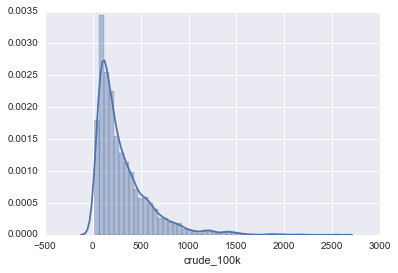

In [22]:
sns.distplot(deaths_pop['crude_100k']) #because this is a rate that was summed in the groupby previously, this needs to be recomputed

In [23]:
deaths_pop['death_rate_100k'] = deaths_pop['deaths'] / (deaths_pop['population_est']/100000) # recompute this
deaths_pop['death_rate_100k'].describe() #new target variable

count    3103.000000
mean       12.299494
std         8.261364
min         0.981196
25%         5.813668
50%        10.318661
75%        16.983953
max        64.956155
Name: death_rate_100k, dtype: float64

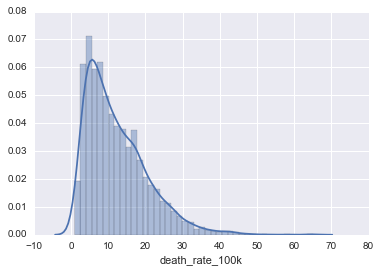

In [24]:
sns.distplot(deaths_pop['death_rate_100k'])

In [25]:
hardest_hit = deaths_pop[['death_rate_100k', 'year', 'county_name', 'deaths', 'population_est']].sort('death_rate_100k')
# hardest_hit = sorted(deaths_pop[['death_rate_100k', 'year', 'county_name']][:-25], reverse=True)
# hardest_hit['year'].mean()
hardest_hit.tail(50)

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,death_rate_100k,year,county_name,deaths,population_est
2658,35.114128,2013,"Bernalillo County, NM",237.0,674942
2366,35.218174,2012,"Bernalillo County, NM",237.0,672948
2642,35.265807,2013,"Washoe County, NV",153.0,433848
1647,35.423148,2010,"Butte County, CA",78.0,220195
2350,35.649959,2012,"Washoe County, NV",153.0,429173
9,35.866048,2003,"Humboldt County, CA",46.0,128255
2860,36.454958,2014,"Pinellas County, FL",342.0,938144
1213,36.580122,2008,"Pasco County, FL",171.0,467467
2083,36.744278,2011,"Bernalillo County, NM",246.0,669492
1432,36.780039,2009,"Denver County, CO",224.0,609026


In [26]:
hardest_hit[hardest_hit['county_name']=='Rio Arriba County, NM'] #population is definitely wrong

,death_rate_100k,year,county_name,deaths,population_est
800,26.970039,2006,"Rio Arriba County, NM",11.0,40786
2084,27.280393,2011,"Rio Arriba County, NM",11.0,40322
2977,57.954946,2014,"Rio Arriba County, NM",23.0,39686
2369,64.602693,2012,"Rio Arriba County, NM",26.0,40246
2661,64.956155,2013,"Rio Arriba County, NM",26.0,40027


In [27]:

# hardest_hit['population'].head(50)

## Based on the prominence of "population" in the predictions (of a rate), going to remove the outliar populations with exceptionally low populations

y and X will be limited features

y_full and X_full will be full datatset

In [28]:
print(deaths_pop['death_rate_100k'][deaths_pop['population_est']<10000].mean(),
deaths_pop['death_rate_100k'][deaths_pop['population_est']<5000].mean(),
deaths_pop['death_rate_100k'][deaths_pop['population_est']<3000].mean()) 

# at 3k, dropping 14 samples
# at 5k 47 samples
# at 10k, 214 samples


#outliars are definitely in this range -- starting with 

(nan, nan, nan)


In [29]:
print(len(deaths_pop[deaths_pop['population_est']<10000]), len(deaths_pop))

(0, 3103)


In [30]:
state_feats

Index([u'AK', u'AL', u'AR', u'AZ', u'CA', u'CO', u'CT', u'DC', u'DE', u'FL',
       u'GA', u'HI', u'IA', u'ID', u'IL', u'IN', u'KS', u'KY', u'LA', u'MA',
       u'MD', u'ME', u'MI', u'MN', u'MO', u'MS', u'MT', u'NC', u'NE', u'NH',
       u'NJ', u'NM', u'NV', u'NY', u'OH', u'OK', u'OR', u'PA', u'RI', u'SC',
       u'SD', u'TN', u'TX', u'UT', u'VA', u'WA', u'WI', u'WV', u'WY'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler
#saving this so can re-run the analysis later with full features
deaths_pop_lim = deaths_pop[deaths_pop['population_est']>10000] # playing with this line to see how it effects model
deaths_pop_lim = deaths_pop_lim[deaths_pop_lim['population_est']<4000000]

deaths_pop.head()

,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,SD,TN,TX,UT,VA,WA,WI,WV,WY,death_rate_100k
0,2003,1073,2146.0,26.0,54422.0,0.054,26.0,54422.0,95.427762,2146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.935030
1,2003,2020,4040.0,24.0,34160.0,0.049,24.0,34160.0,139.969440,4040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.898348
2,2003,4013,72234.0,591.0,1783462.0,1.212,591.0,1783462.0,715.153184,72234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.417921
3,2003,4019,36171.0,149.0,285630.0,0.308,149.0,285630.0,513.516478,36171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.500901
4,2003,4025,4025.0,10.0,11831.0,0.020,10.0,11831.0,84.523709,4025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.456609


In [32]:
def floater(df):
    for col in df:
        try:
            col = col.apply(lambda x: float(x))
        except:
            continue
    return df
                            
deaths_pop = floater(deaths_pop)
deaths_pop.head()
                
# features = deaths_pop.iloc[:,['year','pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','pop_hisp_prop','population','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'T', 'VA', 'WA', 'WI', 'WV', 'WY']]
# #no male features  
# features.isnull().sum()


,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,SD,TN,TX,UT,VA,WA,WI,WV,WY,death_rate_100k
0,2003,1073,2146.0,26.0,54422.0,0.054,26.0,54422.0,95.427762,2146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.935030
1,2003,2020,4040.0,24.0,34160.0,0.049,24.0,34160.0,139.969440,4040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.898348
2,2003,4013,72234.0,591.0,1783462.0,1.212,591.0,1783462.0,715.153184,72234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.417921
3,2003,4019,36171.0,149.0,285630.0,0.308,149.0,285630.0,513.516478,36171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.500901
4,2003,4025,4025.0,10.0,11831.0,0.020,10.0,11831.0,84.523709,4025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.456609


In [33]:

deaths_pop['year'].apply(lambda x: str(x))
year_dums = pd.get_dummies(deaths_pop['year'])
deaths_pop = pd.concat([deaths_pop,year_dums], axis = 1)
deaths_pop[2003]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
3078    0.0
3079    0.0
3080    0.0
3081    0.0
3082    0.0
3083    0.0
3084    0.0
3085    0.0
3086    0.0
3087    0.0
3088    0.0
3089    0.0
3090    0.0
3091    0.0
3092    0.0
3093    0.0
3094    0.0
3095    0.0
3096    0.0
3097    0.0
3098    0.0
3099    0.0
3100    0.0
3101    0.0
3102    0.0
3103    0.0
3104    0.0
3105    0.0
3106    0.0
3107    0.0
Name: 2003, dtype: float64

In [34]:
deaths_pop.describe()



,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,3103.000000,3103.000000,3.103000e+03,3103.000000,3.103000e+03,3103.000000,3103.000000,3.103000e+03,3103.000000,3.103000e+03,...,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,2008.953916,27196.322269,1.179666e+05,95.648405,1.899550e+05,0.164367,95.648405,1.899550e+05,309.133249,1.179666e+05,...,0.069932,0.077989,0.081534,0.079923,0.079278,0.089591,0.091524,0.094102,0.094102,0.105704
std,3.439746,15617.166602,1.383307e+05,157.232371,4.280490e+05,0.276684,157.232371,4.280490e+05,282.642096,1.383307e+05,...,0.255074,0.268198,0.273698,0.271217,0.270216,0.285641,0.288400,0.292018,0.292018,0.307508
min,2003.000000,1003.000000,1.003000e+03,10.000000,1.562000e+03,0.014000,10.000000,1.562000e+03,17.323217,1.003000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,12083.000000,3.440200e+04,15.000000,2.188650e+04,0.029000,15.000000,2.188650e+04,112.227389,3.440200e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,26163.000000,6.803400e+04,43.000000,7.262300e+04,0.072000,43.000000,7.262300e+04,215.381154,6.803400e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,41005.000000,1.450170e+05,114.000000,1.969130e+05,0.192000,114.000000,1.969130e+05,412.728139,1.450170e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2014.000000,56021.000000,1.060422e+06,1812.000000,5.645514e+06,4.154000,1812.000000,5.645514e+06,2566.462631,1.060422e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
## Finding previous year's rates -- remove this cell to include all the 2003 data, but still have a decade

#
deaths_pop = deaths_pop.sort_values(by=['county_code', 'year'])
deaths_pop['prior_year_death_rate_100k'] = deaths_pop['death_rate_100k'].shift(1)

# deaths_pop[deaths_pop['prior_year_death_rate_100k'].isnull()==True]
deaths_pop.drop(886, inplace=1)
deaths_pop.isnull().sum()


year                             0
county_code                      0
County Code                      0
Deaths                           0
Population                       0
pct_total_deaths                 0
deaths                           0
population_x                     0
crude_100k                       0
county_id                        0
death_per_head                   0
AGEGRP                        1474
ORIGIN                        1474
RACE                          1474
SEX                           1474
TOT_POP                       1628
Unnamed: 0                    1474
age_group                     1474
hisp                          1474
pop_15-34                        0
pop_35-54                        0
pop_55+                          0
pop_asian                        0
pop_black                        0
pop_hisp                         0
pop_male                      1474
pop_sub_15                       0
pop_white                        0
population_y        

In [36]:
median_drug_rate = np.median(deaths_pop['death_rate_100k'])
y = deaths_pop['death_rate_100k']

# v1 features = deaths_pop[['year','pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','pop_hisp_prop','population','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]
# v2 features, removed hisp, years, population below = deaths_pop[['pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','pop_hisp_prop','population','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]]

#when including population density, make sure to exclude outliars, esp Alaska
features = deaths_pop[['pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'population_est', 'pop_change_rate','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]

# '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'
features.to_csv('/Users/HudsonCavanagh/Dropbox/Capstone/csv_output/full_features_cdc_states_v4.csv')


In [37]:
X = StandardScaler().fit_transform(features)
X = pd.DataFrame(X, columns=features.columns)

#PCA for later plots & model testing

pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
pca_4 = PCA(n_components=4)
xPC_2 = pca_2.fit_transform(X)
xPC_3 = pca_3.fit_transform(X)
xPC_4 = pca_4.fit_transform(X)

## Implementing Tree Models, partially for feature importance

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.cross_validation import StratifiedKFold, permutation_test_score
from sklearn.tree import DecisionTreeRegressor

stratk = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=66)


dt_simple = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=6, max_depth=6)
dt_simple.fit(X,y)
s_dt = cross_val_score(dt_simple, X, y, cv=stratk, n_jobs=-1)

print("Decision Tree", s_dt.mean())


/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


('Decision Tree', 0.36101654050069565)


 ## Can't currently get gridsearchcv to work
 
 moving on for now - i think its related to my kernel

In [39]:
# from sklearn.grid_search import GridSearchCV

# split_vals = [2,3,4,5,6,7,8,9]
# depths = [3,4,5,6,7,8,9,10]
# max_feats = [3,4,5,6,7,8,10,12,14,20]

# dt = DecisionTreeRegressor()


# gs_dt = GridSearchCV(dt, {'min_samples_split': split_vals, 'max_depth': depths, 'max_features': max_feats}, cv=15)
# gs_dt.fit(X, y)
# s_gb_tree_cv = cross_val_score(gs_dt, X, y, cv=stratk, n_jobs=-1, scoring='f1')

# print(s_gb_tree_cv.mean(),
# gs_dt.best_params_)



In [40]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
import seaborn as sns

rf = RandomForestRegressor()
rf_cv = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)
rf.fit(X_train, y_train)
ypred_rf = rf.predict(X_test)
s_rf_cv = cross_val_score(rf_cv, X, y, cv=stratk, n_jobs=-1)
    
s_rf_cv.mean()

#real progress with the random forest -- lets see how it compares to bagging  (~.90)
#.755 with no population, pop growth features

0.66140503578702903

In [41]:
#BAGGING NOT WORKING

# bc_cv = BaggingRegressor(n_estimators=100)

# #X_scale = X_train     X_dums = Xd_train
# # bc.fit(X_train,y_train)
# s_bc = cross_val_score(bc_cv, X, y, cv=stratk, n_jobs=-1, scoring='f1')
# s_bc.mean()

# print("{} Score:\t{:0.3} ± {:0.3}".format("Bagging Trees", s_bc.mean(), s_bc.std()))


In [42]:
# gs_rf = GridSearchCV(rf, {'min_samples_split': split_vals, 'max_depth': depths, 'max_features': max_feats}, cv=15)
# s_gs_rf_cv = cross_val_score(gs_rf, X, y, cv=stratk, n_jobs=-1)
# s_gs_rf_cv.mean()

## Looking at Feature Importance

In [43]:
rel_feature_import = sorted(zip(rf.feature_importances_, features.columns), reverse=True)
rel_feature_import = pd.DataFrame(rel_feature_import)
rel_feature_import #pop was .74 before outliar removal

,0,1
0,0.199922,population_est
1,0.134165,pov_rate
2,0.098009,natural_pop_growth_rate
3,0.061472,pop_asian_prop
4,0.057546,pop_white_prop
5,0.050066,pop_black_prop
6,0.038150,unemp_rate
7,0.037432,intl_migrate_rate
8,0.031331,pop_55+_prop
9,0.030093,pop_sub_15_prop


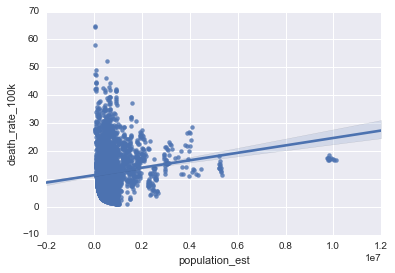

In [44]:
#because population at the top, let's graph how it relates to mortality rate

sns.regplot(x='population_est', y='death_rate_100k', data=deaths_pop) #some serious outliar action
#appears all the outliars are at very low populations

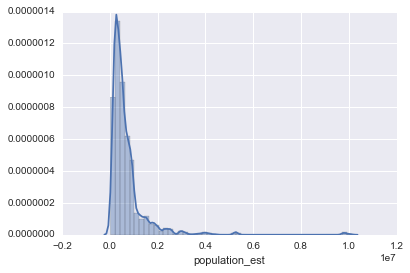

In [45]:
sns.distplot(deaths_pop['population_est'])

Turns out, low population counties have dramatically higher mortality than larger population areas, (smaller than a million compared to bigger than a million)

In [46]:
# print(deaths_pop['death_rate_100k'][deaths_pop['population']<100000].mean(), 
# deaths_pop['death_rate_100k'][deaths_pop['population']<10000].mean()) #these are dramatic outliars, lets take them out
#re-running this model with limited dataset
#less than 100k pop has higher mean than less than a million, less than 10k has highest likelihood

In [47]:
# deaths_pop['county_code'][deaths_pop['population']<1000000].value_counts()
# deaths_pop[deaths_pop['county_code']==26025] #2009 seems to have an error - looks like deaths and pop for 2008 & 2009 pooled
# deaths_pop[deaths_pop['county_code']==53015] #no issues
# deaths_pop[deaths_pop['county_code']==47093] #no issues
# deaths_pop[deaths_pop['county_code']==41005] #no issues

#lead by Calhoun County, Michigan (26025) but looks like issues with 2009

s_rf_cv.mean()

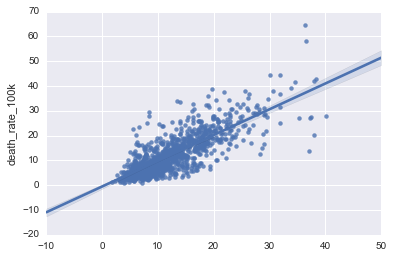

In [48]:
sns.regplot(ypred_rf, y_test)

## Implementing Kaggle-Darling XG Boost 

In [49]:
import xgboost

# fit model no training data
xg_model = xgboost.XGBRegressor()
xg_model_cv = xgboost.XGBRegressor()
xg_model.fit(X_train, y_train)

s_xg_cv = cross_val_score(xg_model_cv, X, y, cv=stratk, n_jobs=-1)

# make predictions for test data
y_pred_xg = xg_model.predict(X_test)
s_xg_cv.mean()

0.56761469583414481

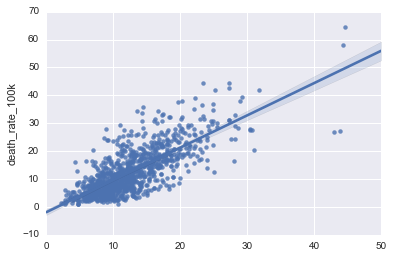

In [50]:
sns.regplot(y_pred_xg, y_test)

### Implementing GradientBoosting Regressor to see if this is diff from XG Boost

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gb_tree = GradientBoostingRegressor(n_estimators=1000)
gb_tree_cv = GradientBoostingRegressor(n_estimators=1000, max_depth=10)

gb_tree.fit(X_train, y_train)
ypred_gbtree = gb_tree.predict(X_test)


s_gb_tree_cv = cross_val_score(gb_tree_cv, X, y, cv=stratk, n_jobs=-1)
s_gb_tree_cv.mean()



0.70018988278762284

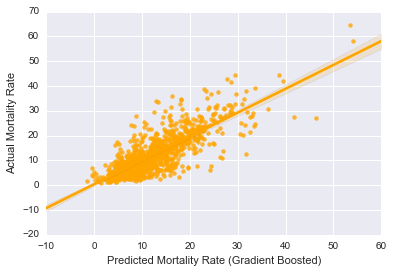

In [52]:
sns.regplot(ypred_gbtree, y_test, color="orange")
plt.xlabel('Predicted Mortality Rate (Gradient Boosted)')
plt.ylabel('Actual Mortality Rate')
plt.show()

In [53]:
### Quick visualization t-SNE 
### Also want to do some classification with DB Scan

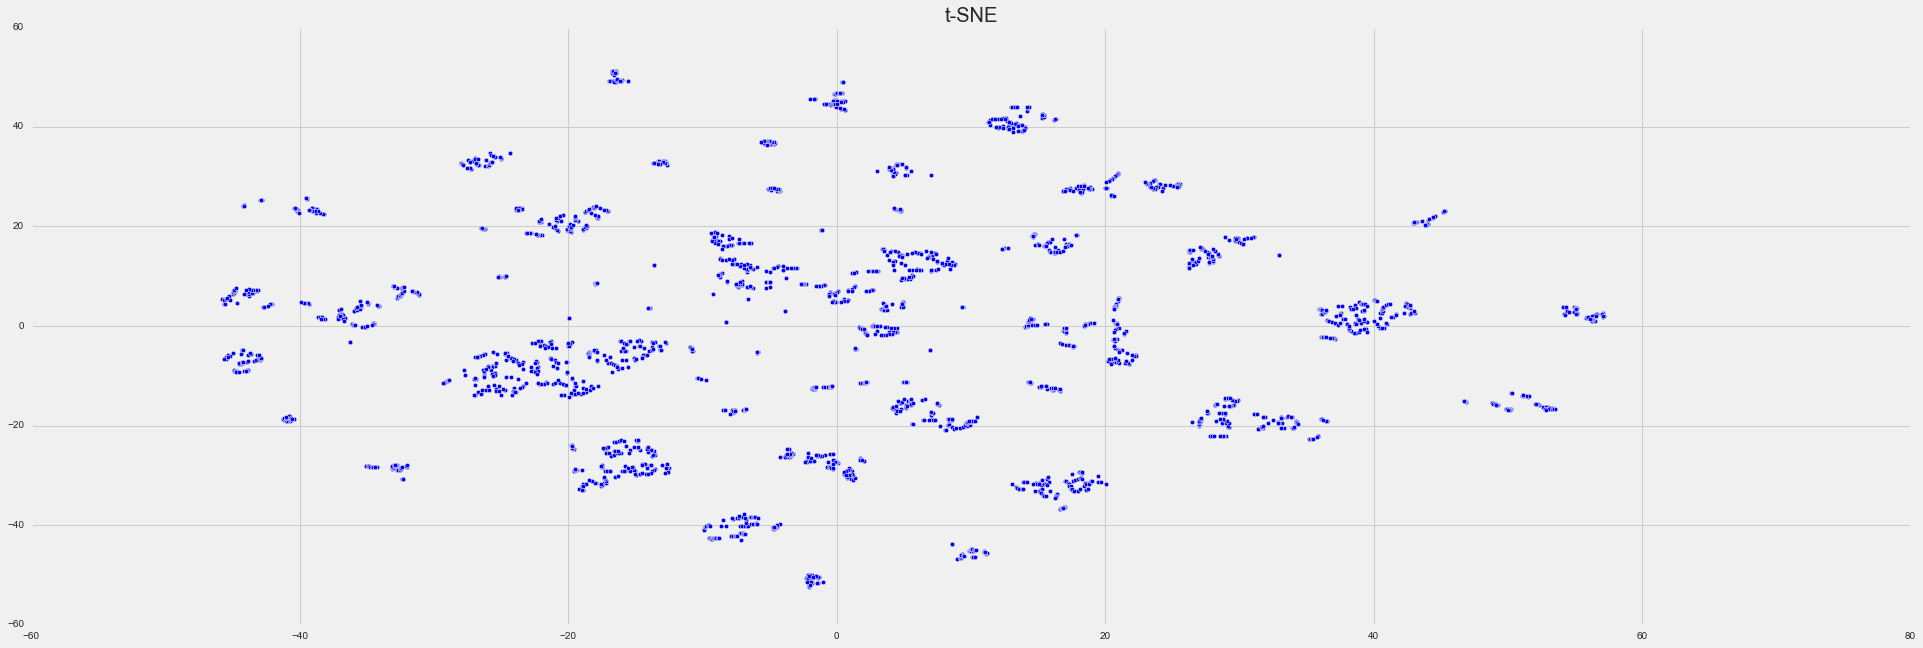

In [54]:
import datetime
from tsne import bh_sne
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
# t0 = datetime.time()
# X_tsne = tsne.fit_transform(features)


X_2d = bh_sne(X)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 10))
plt.scatter(X_2d[:,0],X_2d[:,1])
plt.title('t-SNE')
plt.xlabel('')
plt.ylabel('')


plt.show()

## Training a bunch more models to see if any improvements 

In [55]:
# ada_tree_scale = AdaBoostClassifier(n_estimators=100)
# gb_tree_scale = GradientBoostingClassifier(n_estimators=100)
# ada_rand_forest_scale = AdaBoostClassifier(RandomForestClassifier(class_weight='balanced', n_estimators=1000), n_estimators=100)
# # gb_rand_forest_scale = GradientBoostingClassifier(RandomForestClassifier(class_weight='balanced', n_estimators=1000), n_estimators=100)
# bc_rand_forest_scale = BaggingClassifier(RandomForestClassifier(class_weight='balanced', n_estimators=100), n_estimators=100) #.973  - .98 after
# bc_knn = BaggingClassifier(KNeighborsClassifier(), n_estimators=1000) #.973  - .98 after


## Exploring Outcomes

In [56]:
deaths_pop[['county_name', 'year', 'deaths']][deaths_pop['death_rate_100k']>200][deaths_pop['population']>10000]

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,county_name,year,deaths


## Summarizing info from the above

a rate of 200 means that in any given year, 0.2% of the population (or 1 in every 500 people) died in any given year from a drug-related cause. Such a rate occured only once prior to 2010 and 12 times since then. 

-- deep issues in the appalacia area


### Moving into clustering/ unsupervised methods & visualization

In [57]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score


db1 = DBSCAN(eps = 4, min_samples = 15).fit(X)  
db1labels = db1.labels_  
core_samples = db1.core_sample_indices_

print("Silhouette Coefficient: %0.3f" 
      % silhouette_score(X, db1labels), len(set(db1labels)), db1labels.mean())

('Silhouette Coefficient: 0.450', 41, 16.268214055448098)


In [58]:
db2 = DBSCAN(eps = 7, min_samples = 8).fit(X)  
db2labels = db2.labels_  
core_samples = db2.core_sample_indices_

# db2labels 
print("Silhouette Coefficient: %0.3f" 
      % silhouette_score(X, db1labels), len(set(db2labels)), db2labels.mean())

('Silhouette Coefficient: 0.450', 37, 10.328820116054159)


In [59]:
# df_pca_2['cluster'] = pd.Series(clusters_pca.labels_)
plt.style.use('fivethirtyeight')
xPC_2 = pd.DataFrame(xPC_2, columns=['pc1', 'pc2'])
xPC_2.head()

,pc1,pc2
0,-0.345091,1.512775
1,-0.448877,1.352322
2,0.332354,2.177236
3,0.319603,2.221966
4,0.278071,2.290085


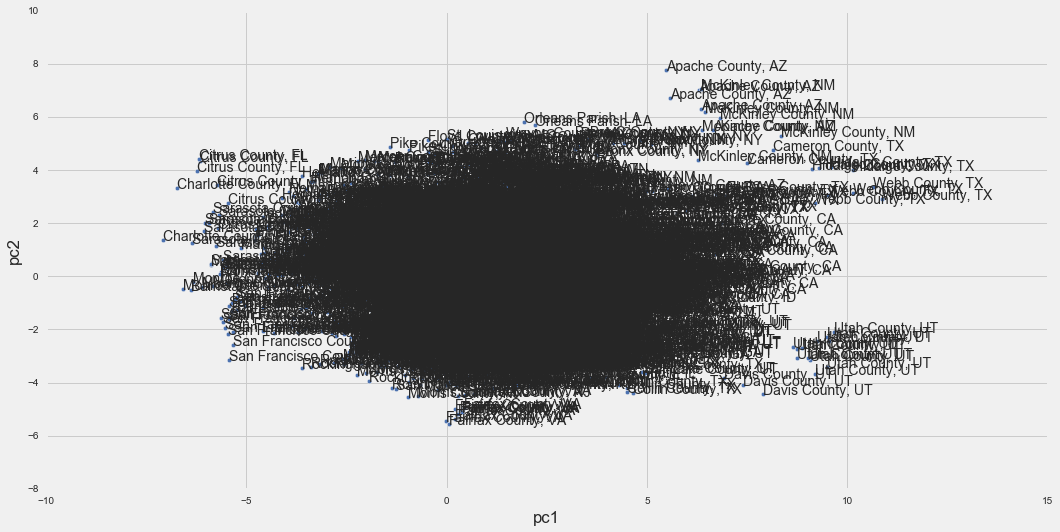

In [60]:
graph = xPC_2.plot(kind='scatter', x='pc1', y='pc2', figsize=(16,8))

for i, county in enumerate(deaths_pop['county_name']):
    graph.annotate(county, (xPC_2.iloc[i,0], xPC_2.iloc[i,1]))

### Implementing Classification Model

In [61]:
median_drug_rate

10.318895723188433

In [62]:
y_bin = y.apply(lambda x: 1 if x > median_drug_rate else 0)

In [63]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

rf_c_cv = RandomForestClassifier()


s_rf_cv = cross_val_score(rf_c_cv, X, y_bin, cv=stratk, n_jobs=-1)
    
s_rf_cv.mean()

0.81380294606443149

In [64]:
xg_class_model_cv = xgboost.XGBClassifier()

s_xg_cv = cross_val_score(xg_class_model_cv, X, y_bin, cv=stratk, n_jobs=-1)

s_xg_cv.mean()

0.81256482391189633

## Next Steps

#### Need to go back to summary statistics extracted and make sure trends found here agree to those findings
#### Need to explore why population figures are so distorted
- go through from beginning and just follow that column
#### Look for further features to add:
- population density
- policy features
- 

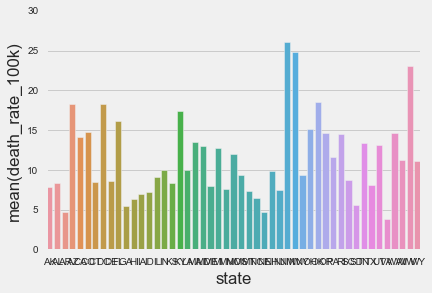

In [65]:
state_change = pd.pivot_table(deaths_pop, values=['death_rate_100k'], index=['state', 'year'], aggfunc='mean')
state_average = pd.pivot_table(deaths_pop, values=['death_rate_100k'], index=['state'], aggfunc='mean')

year_average = pd.pivot_table(deaths_pop, values=['death_rate_100k'], index=['year'], aggfunc='mean')
# death_rate_pivot =pd.pivot_table(cdc_99_14, values=['crude_100k'], index=['County','year'], aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
state_average.reset_index(inplace=1)

sns.barplot(data = state_average, y='death_rate_100k', x='state')
# state_average['delta'] = state_average['delta']

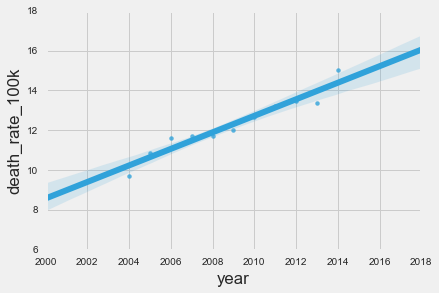

In [66]:
year_average.reset_index(inplace=1)
sns.regplot(data = year_average, y='death_rate_100k', x='year')


In [67]:



ypred_gbtree = pd.DataFrame(ypred_gbtree)
y_test = pd.DataFrame(y_test)
pred_act_diff = y_test.merge(deaths_pop, how='left', left_index=1, right_index=1)
pred_act_diff['death_rate_actual_ytest'] = pred_act_diff['death_rate_100k_x']
pred_act_diff = pred_act_diff.merge(ypred_gbtree, how='left', left_index=1, right_index=1)
pred_act_diff['death_rate_pred_gb'] = pred_act_diff[0]
pred_act_diff = pred_act_diff[pred_act_diff['death_rate_pred_gb'].isnull()==False]
# deaths_pop = pd.merge(deaths_pop, pop_03_14, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])
# pred_act_diff['predicted_gb'] = pred_act_diff[0]
# pred_act_diff['residual'] = pred_act_diff['death_rate_100k'] - pred_act_diff['predicted_gb']
pred_act_diff['residual'] = pred_act_diff['death_rate_pred_gb'] - pred_act_diff['death_rate_actual_ytest']

#note positive means that actual > predicted
pred_act_diff[['residual', 'death_rate_pred_gb', 'death_rate_actual_ytest', 'county_name', 'year']]


,residual,death_rate_pred_gb,death_rate_actual_ytest,county_name,year
541,0.662788,4.330045,3.667258,"St. Charles County, MO",2005
846,-9.342004,3.194977,12.536981,"Montgomery County, PA",2006
162,-14.857897,15.904948,30.762845,"Multnomah County, OR",2003
873,-11.860640,10.356735,22.217375,"Salt Lake County, UT",2006
100,1.940107,9.154073,7.213966,"Calhoun County, MI",2003
212,7.243669,10.903295,3.659626,"Anchorage Borough, AK",2004
9,-13.597230,22.268818,35.866048,"Humboldt County, CA",2003
259,2.617258,10.536490,7.919232,"New Castle County, DE",2004
473,5.564228,9.228000,3.663772,"Escambia County, FL",2005
251,0.862843,16.887099,16.024256,"El Paso County, CO",2004


In [68]:
predict_eval = pred_act_diff[['residual', 'death_rate_pred_gb', 'death_rate_actual_ytest', 'county_name', 'year']].sort('residual')
predict_eval.head(25)

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,residual,death_rate_pred_gb,death_rate_actual_ytest,county_name,year
90,-36.411609,8.114206,44.525816,"Baltimore city, MD",2003
956,-26.894657,8.198722,35.093379,"Pasco County, FL",2007
947,-22.496086,4.877293,27.373379,"Hillsborough County, FL",2007
681,-21.546203,13.266188,34.812391,"Denver County, CO",2006
711,-19.745459,18.350484,38.095943,"Pinellas County, FL",2006
20,-19.014477,5.609619,24.624096,"San Francisco County, CA",2003
768,-17.952833,9.422336,27.375169,"Wayne County, MI",2006
534,-17.946199,6.536130,24.482330,"Wayne County, MI",2005
445,-17.395088,9.474363,26.869452,"San Francisco County, CA",2005
837,-17.000293,12.277698,29.277990,"Multnomah County, OR",2006


In [69]:
predict_eval.tail(25)

#the counties that appear here

,residual,death_rate_pred_gb,death_rate_actual_ytest,county_name,year
522,15.008189,26.680647,11.672459,"Plymouth County, MA",2005
341,15.230342,17.767066,2.536724,"Ocean County, NJ",2004
790,15.339762,23.380286,8.040524,"Essex County, NJ",2006
812,15.685416,19.997705,4.312289,"Cumberland County, NC",2006
675,15.773311,18.458190,2.684878,"Tulare County, CA",2006
731,16.421369,20.571248,4.149879,"St. Joseph County, IN",2006
229,16.438310,28.310613,11.872303,"Orange County, CA",2004
582,16.606893,19.247053,2.640159,"Stark County, OH",2005
845,16.720697,19.936782,3.216086,"Luzerne County, PA",2006
549,16.853175,25.052528,8.199354,"Merrimack County, NH",2005


# Proceeding to predict 2014

In [77]:
input_2013 = deaths_pop[deaths_pop['year']!=2014]
test_2014 = deaths_pop[deaths_pop['year']==2014]

#creating regression training
y_03_13 = input_2013['death_rate_100k']

#regression target
y_14 = test_2014['death_rate_100k']

#creating classification (bigger/ smaller) train & target
y_delta_bin_03_13 = (input_2013['death_rate_100k']-input_2013['prior_year_death_rate_100k']).apply(lambda x: 1 if x >= 0 else 0) #one means increase
y_delta_bin_14 = (test_2014['death_rate_100k']-test_2014['prior_year_death_rate_100k']).apply(lambda x: 1 if x >= 0 else 0) #one means increase

#8/22 added prior year death rate as feature 

features_03_13 = input_2013[['prior_year_death_rate_100k', 'pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'population_est', 'pop_change_rate','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]
features_14 = test_2014[['prior_year_death_rate_100k', 'pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'population_est', 'pop_change_rate','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]
X_03_13 = StandardScaler().fit_transform(features_03_13)
X_03_13 = pd.DataFrame(X_03_13, columns=features_03_13.columns)

X_14 = StandardScaler().fit_transform(features_14)
X_14 = pd.DataFrame(X_14, columns=features_14.columns)

gb_14 = GradientBoostingRegressor(n_estimators=1000, max_depth=10)


gb_14.fit(X_03_13, y_03_13)
ypred_14 = gb_14.predict(X_14)
zip(ypred_14, y_14)

[(13.401371288149354, 31.497589222978704),
 (5.0774266934118844, 2.8562288639064071),
 (5.5080894994021525, 12.291348336811865),
 (5.191879881638803, 7.9904913153347517),
 (20.805543295654925, 28.483954365037647),
 (21.65304261853057, 28.524917499053267),
 (23.986074645390222, 29.773640669000763),
 (7.4500626613650596, 3.0263214306430175),
 (17.154625867249713, 31.985085811415935),
 (7.5511762618714808, 4.1174629840077737),
 (5.373015660466236, 2.8026191750108285),
 (9.3250593528662602, 13.26843785844933),
 (25.587583230771486, 37.940839072815166),
 (8.9392474803197519, 11.333891032733357),
 (16.820711751989553, 13.111171810980606),
 (14.244386186969065, 20.518496180761733),
 (14.532492351797183, 34.858452433045812),
 (18.449723546516591, 28.369118841441793),
 (21.948098095684436, 15.587006671238855),
 (17.175235813920349, 16.954457202162416),
 (6.2153002360661986, 4.6056419113413929),
 (4.0772640114487846, 3.2460531471644569),
 (15.657208459681597, 18.760169045021545),
 (7.30816267603

In [78]:

ypred_14 = pd.DataFrame(ypred_14)
y_14 = pd.DataFrame(y_14)
pred_act_diff_14 = y_14.merge(deaths_pop, how='left', left_index=1, right_index=1)
pred_act_diff_14['death_rate_100k_observed'] = pred_act_diff_14['death_rate_100k_x']


In [79]:
pred_act_diff_14.head()

,death_rate_100k_x,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,...,2007,2008,2009,2010,2011,2012,2013,2014,prior_year_death_rate_100k,death_rate_100k_observed
2780,31.497589,2014,1073,10730.0,208.0,218219.0,0.504,208.0,218219.0,945.575675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.962390,31.497589
2781,2.856229,2014,1089,1089.0,10.0,13907.0,0.024,10.0,13907.0,71.906234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.768343,2.856229
2782,12.291348,2014,1097,4388.0,51.0,64875.0,0.123,51.0,64875.0,314.275136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.070982,12.291348
2783,7.990491,2014,2020,4040.0,24.0,27177.0,0.058,24.0,27177.0,176.662734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.311245,7.990491
2784,28.483954,2014,4013,108351.0,1165.0,2461168.0,2.820,1165.0,2461168.0,2566.462631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.448649,28.483954


In [80]:
#need to find the target variable, as I did above
pred_act_diff_14.reset_index(inplace=1)
pred_act_diff_14 = pred_act_diff_14.merge(ypred_14, how='left', left_index=1, right_index=1)
pred_act_diff_14['death_rate_pred_14'] = pred_act_diff_14[0]

# pred_act_diff_14[['residual', 'death_rate_pred_gb', 'death_rate_actual_ytest', 'county_name', 'year']]


In [81]:
pred_act_diff_14

,index,death_rate_100k_x,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,...,2009,2010,2011,2012,2013,2014,prior_year_death_rate_100k,death_rate_100k_observed,0,death_rate_pred_14
0,2780,31.497589,2014,1073,10730.0,208.0,218219.0,0.504,208.0,218219.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13.962390,31.497589,13.401371,13.401371
1,2781,2.856229,2014,1089,1089.0,10.0,13907.0,0.024,10.0,13907.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.768343,2.856229,5.077427,5.077427
2,2782,12.291348,2014,1097,4388.0,51.0,64875.0,0.123,51.0,64875.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.070982,12.291348,5.508089,5.508089
3,2783,7.990491,2014,2020,4040.0,24.0,27177.0,0.058,24.0,27177.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.311245,7.990491,5.191880,5.191880
4,2784,28.483954,2014,4013,108351.0,1165.0,2461168.0,2.820,1165.0,2461168.0,...,0.0,0.0,0.0,0.0,0.0,1.0,26.448649,28.483954,20.805543,20.805543
5,2785,28.524917,2014,4015,16060.0,58.0,48347.0,0.140,58.0,48347.0,...,0.0,0.0,0.0,0.0,0.0,1.0,20.706077,28.524917,21.653043,21.653043
6,2786,29.773641,2014,4019,48228.0,299.0,331842.0,0.721,299.0,331842.0,...,0.0,0.0,0.0,0.0,0.0,1.0,24.062128,29.773641,23.986075,23.986075
7,2787,3.026321,2014,4021,4021.0,12.0,15725.0,0.029,12.0,15725.0,...,0.0,0.0,0.0,0.0,0.0,1.0,6.746938,3.026321,7.450063,7.450063
8,2788,31.985086,2014,4025,20125.0,70.0,59631.0,0.170,70.0,59631.0,...,0.0,0.0,0.0,0.0,0.0,1.0,28.336376,31.985086,17.154626,17.154626
9,2789,4.117463,2014,5007,5007.0,10.0,12507.0,0.024,10.0,12507.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.438034,4.117463,7.551176,7.551176


In [82]:
pred_act_diff_14 = pred_act_diff_14[pred_act_diff_14['death_rate_pred_14'].isnull()==False]
pred_act_diff_14.isnull().sum()

index                           0
death_rate_100k_x               0
year                            0
county_code                     0
County Code                     0
Deaths                          0
Population                      0
pct_total_deaths                0
deaths                          0
population_x                    0
crude_100k                      0
county_id                       0
death_per_head                  0
AGEGRP                        328
ORIGIN                        328
RACE                          328
SEX                           328
TOT_POP                         0
Unnamed: 0                    328
age_group                     328
hisp                          328
pop_15-34                       0
pop_35-54                       0
pop_55+                         0
pop_asian                       0
pop_black                       0
pop_hisp                        0
pop_male                      328
pop_sub_15                      0
pop_white     

In [83]:

#note positive means that actual > predicted

pred_act_diff_14['residual'] = pred_act_diff_14['death_rate_pred_14'] - pred_act_diff_14['death_rate_100k_observed']
pred_act_diff_14['residual'].mean() # ~ -11, meaning that predictions are slightly higher on average than observations

-3.1898377352501655

In [84]:
# np.corr(pred_act_diff_14['death_rate_pred_14'],pred_act_diff_14['death_rate_100k_observed'])

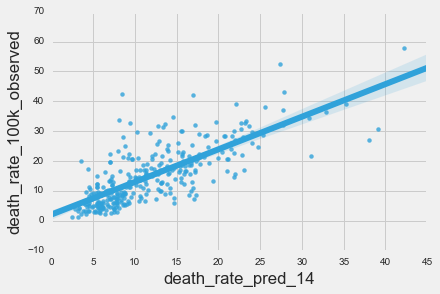

In [85]:
sns.regplot(data=pred_act_diff_14, x='death_rate_pred_14', y='death_rate_100k_observed')

In [86]:

#note positive means that actual > predicted
pred_act_diff_14[['residual', 'death_rate_pred_14', 'death_rate_100k_observed', 'county_name']]


,residual,death_rate_pred_14,death_rate_100k_observed,county_name
0,-18.096218,13.401371,31.497589,"Jefferson County, AL"
1,2.221198,5.077427,2.856229,"Madison County, AL"
2,-6.783259,5.508089,12.291348,"Mobile County, AL"
3,-2.798611,5.191880,7.990491,"Anchorage Borough, AK"
4,-7.678411,20.805543,28.483954,"Maricopa County, AZ"
5,-6.871875,21.653043,28.524917,"Mohave County, AZ"
6,-5.787566,23.986075,29.773641,"Pima County, AZ"
7,4.423741,7.450063,3.026321,"Pinal County, AZ"
8,-14.830460,17.154626,31.985086,"Yavapai County, AZ"
9,3.433713,7.551176,4.117463,"Benton County, AR"


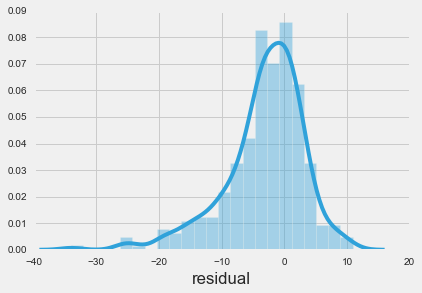

In [87]:
sns.distplot(pred_act_diff_14['residual'])

In [88]:
median_drug_rate

10.318895723188433

In [89]:
y_14

,death_rate_100k
2780,31.497589
2781,2.856229
2782,12.291348
2783,7.990491
2784,28.483954
2785,28.524917
2786,29.773641
2787,3.026321
2788,31.985086
2789,4.117463


In [90]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_bin_03_13 = y_03_13.apply(lambda x: 1 if x > median_drug_rate else 0)
y_bin_14_obs = y_14['death_rate_100k'].apply(lambda x: 1 if x > median_drug_rate else 0)


xg_class_model_14 = xgboost.XGBClassifier()
xg_class_model_14.fit(X_03_13, y_bin_03_13)
y_class_14 = xg_class_model_14.predict(X_14)

xg_14_cm = confusion_matrix(y_bin_14_obs, y_class_14, labels=xg_class_model_14.classes_)
# xg_14_cm = pd.DataFrame(xg_14_cm, columns=xg_class_model_14.classes_, index=xg_class_model_14.classes_) 
print(xg_14_cm)





# X_03_13 
# X_14 
# y_03_13
# y_14

# s_xg_cv = cross_val_score(xg_class_model_cv, X, y_bin, cv=stratk, n_jobs=-1)

# s_xg_cv.mean()

[[122  13]
 [ 56 137]]


In [91]:
print('f1:', sklearn.metrics.f1_score(y_bin_14_obs,y_class_14),
'accuracy:', accuracy_score(y_bin_14_obs,y_class_14))

('f1:', 0.79883381924198249, 'accuracy:', 0.78963414634146345)


In [96]:
xg_delta_model_14 = xgboost.XGBClassifier()
xg_delta_model_14.fit(X_03_13, y_delta_bin_03_13)
y_delta_14_pred = xg_delta_model_14.predict(X_14)

xg_delta_14_cm = confusion_matrix(y_delta_bin_14, y_delta_14_pred, labels=xg_delta_model_14.classes_)
# xg_14_cm = pd.DataFrame(xg_14_cm, columns=xg_class_model_14.classes_, index=xg_class_model_14.classes_) 
print(xg_delta_14_cm)


[[ 85  33]
 [116  94]]


In [97]:
print('f1:', sklearn.metrics.f1_score(y_delta_bin_14, y_delta_14_pred),
'accuracy:', accuracy_score(y_delta_bin_14, y_delta_14_pred))

#marginally better than random guessing!!!

('f1:', 0.55786350148367958, 'accuracy:', 0.54573170731707321)


In [98]:
y_delta_bin_14.mean() #nope, baseline is .64, meaning the model does worse than simply guessing every county will get worse...

0.6402439024390244

## Test for delta from the year before 

## Trying to create function to compare each county-year to the county-year before to see if predictions were better than random fluctuation to see where would see mortality increase

In [93]:
# y_bin_03_13 = y_03_13.apply(lambda x: 1 if x > median_drug_rate else 0)
# y_bin_14_obs = y_14['death_rate_100k'].apply(lambda x: 1 if x > median_drug_rate else 0)


# input_2014 = deaths_pop[deaths_pop['year']!=2014]
# test_2014 = deaths_pop[deaths_pop['year']==2014]


# deaths_pop['mortality_delta']



def last_year(df):
    
    for i in range(5):
        
       print(df.iterrows())
    

last_year(deaths_pop)

<generator object iterrows at 0x1367b6eb0>
<generator object iterrows at 0x1367b6eb0>
<generator object iterrows at 0x1367b6eb0>
<generator object iterrows at 0x1367b6eb0>
<generator object iterrows at 0x1367b6eb0>
